# Probability Distribution Problems

**Binomial Distribution**

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment, for example, when you flip a coin it can by either Head or Tails.

In [4]:
# Probability functions, density and distribution

def dbinom(x,size,prob=0.5):
    """
    Calculates the point estimate of the binomial distribution
    """
    from scipy.stats import binom
    result=binom.pmf(k=x,n=size,p=prob,loc=0)
    return result

def pbinom(q,size,prob=0.5):
    """
    Calculates the cumulative of the binomial distribution
    """
    from scipy.stats import binom
    result=binom.cdf(k=q,n=size,p=prob,loc=0)
    return result

def qbinom(p, size, prob=0.5):
    """
    Calculates the quantile function from the binomial distribution
    """
    from scipy.stats import binom
    result=binom.ppf(q=p,n=size,p=prob,loc=0)
    return result

def rbinom(n,size,prob=0.5):
    """
    Generates random variables from the binomial distribution
    """
    from scipy.stats import binom
    result=binom.rvs(n=size,p=prob,size=n)
    return result

In [5]:
dbinom(2, size = 10, prob = 0.2) #Probability that a binomial (10,0.2) takes the value 2,
pbinom(2, size = 10, prob = 0.2) #Probability that a binomial (10,0.2) will take a value less than 2
qbinom(0.9, size = 10, prob = 0.2) # what value of a binomial (10,0.2) has a cumulative probability of 0.9?
rbinom(2000, size = 10, prob = 0.2) # generate 2000 random values from a binomial distribution (10,0.2)

array([2, 3, 2, ..., 2, 1, 1])

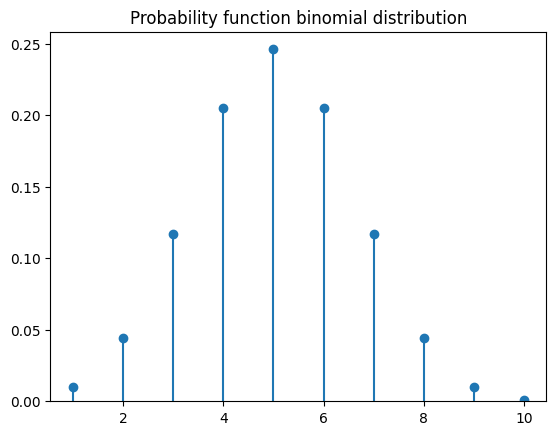

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Discrete distributions
xs = np.arange( 1, 11 )
ys = dbinom(xs,size=10,prob=0.5) # compute the shape of the distribution
plt.plot( xs, ys, 'o' )   # plot circles...
plt.vlines( xs, 0, ys )   # ...and lines
plt.ylim( bottom=0 )      # ensure sensible bottom border
plt.title('Probability function binomial distribution')
plt.show()

Exercise 1: Create the same functions but for the normal and uniform distribution.

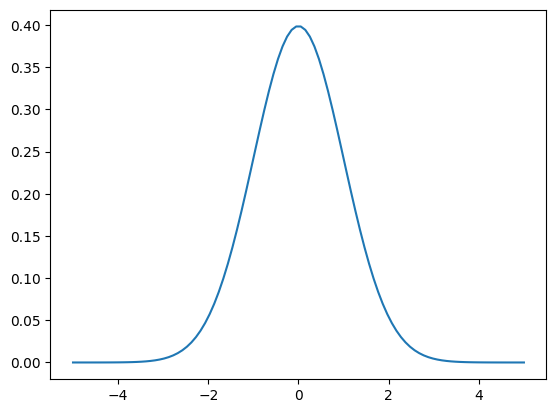

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_normal_distribution(mu, sigma):
  """
  Plots the probability density function of the normal distribution.
  Args:
    mu: The mean of the distribution.
    sigma: The standard deviation of the distribution.
  """
  x = np.linspace(-5, 5, 100)
  y = norm.pdf(x, loc=mu, scale=sigma)
  plt.plot(x, y)
  plt.show()

if __name__ == "__main__":
  plot_normal_distribution(0, 1)


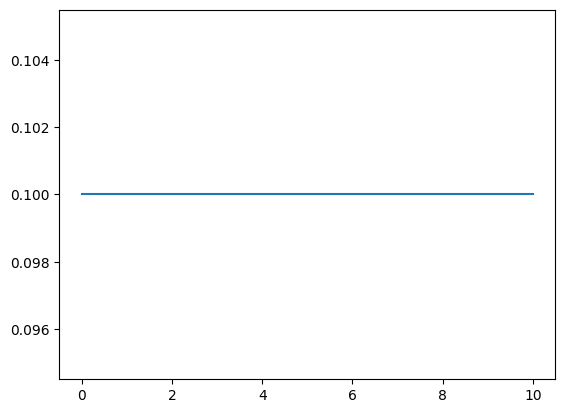

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

def plot_uniform_distribution(a, b):
  """
  Plots the probability density function of the uniform distribution.
  Args:
    a: The lower limit of the distribution.
    b: The upper limit of the distribution.
  """
  x = np.linspace(a, b, 100)
  y = uniform.pdf(x, loc=a, scale=(b - a))
  plt.plot(x, y)
  plt.show()

if __name__ == "__main__":
  plot_uniform_distribution(0, 10)


  